# Exploring Iowa Liquor Sales
This dataset contains every wholesale purchase of liquor in the State of Iowa by retailers for sale to individuals since January 1, 2012. The State of Iowa controls the wholesale distribution of liquor intended for retail sale, which means this dataset offers a complete view of retail liquor sales in the entire state. The dataset contains every wholesale order of liquor by all grocery stores, liquor stores, convenience stores, etc., with details about the store and location, the exact liquor brand and size, and the number of bottles ordered.

In addition to being an excellent dataset for analyzing liquor sales, this is a large and clean public dataset of retail sales data. It can be used to explore problems like stockout prediction, retail demand forecasting, and other retail supply chain problems.

### 1. Problem Definition
> Explore the dataset and see if some useful information can be extracted

### 2. Data
The original dataset can be found [here](https://console.cloud.google.com/marketplace/product/iowa-department-of-commerce/iowa-liquor-sales?project=thinkmatch-proj&folder=&organizationId=).\
Table size: 5.47 GB\
Number of attributes: 24\
Number of instances: 20,546,005\
Last update: 2021-02-05 02:21:27

For this project, we will not use all of the instances, instead a small percent is enough. But how small are we talking about?\
* According to [this site](http://www.tools4dev.org/resources/how-to-choose-a-sample-size/#:~:text=A%20good%20maximum%20sample%20size%20is%20usually%20around%2010%25%20of,the%20maximum%20would%20be%201000.), "A good maximum sample size is around 10% of the population (our original number of instances) as long as it does not exceed 1000.\
10% of 20,546,005 is 2,054,600. So 1000 samples it is.

But there are more things to consider when getting samples: margin of error and confidence level.
* [This site](https://www.qualtrics.com/au/experience-management/research/determine-sample-size/?rid=ip&prevsite=en&newsite=au&geo=ID&geomatch=au) lets you calculate quickly how many samples do we need. We will put 95% confidence and +-2% margin error. As a result, we get **2401** ideal sample size.

### 3. Features
* **invoice_and_item_number**: Concatenated invoice and line number associated with the liquor order. This provides a unique identifier for the individual liquor products included in the store order.
* **date**: Date of order.
* **store_number**: Unique number assigned to the store who ordered the liquor.
* **store_name**: Name of store who ordered the liquor.
* **address**: Address of store who ordered the liquor.
* **city**: City where the store who ordered the liquor is located
* **zip_code**: Zip code where the store who ordered the liquor is located
* **store_location**: Location of store who ordered the liquor. The Address, City, State and Zip Code are geocoded to provide geographic coordinates. Accuracy of geocoding is dependent on how well the address is interpreted and the completeness of the reference data used.
* **county_number**: Iowa county number for the county where store who ordered the liquor is located
* **county**: County where the store who ordered the liquor is located
* **category**: Category code associated with the liquor ordered
* **category_name**: Category of the liquor ordered.
* **vendor_number**: The vendor number of the company for the brand of liquor ordered
* **vendor_name**: The vendor name of the company for the brand of liquor ordered
* **item_number**: Item number for the individual liquor product ordered.
* **item_description**: Description of the individual liquor product ordered.
* **pack**: The number of bottles in a case for the liquor ordered
* **bottle_volume_ml**: Volume of each liquor bottle ordered in milliliters.
* **state_bottle_cost**: The amount that Alcoholic Beverages Division paid for each bottle of liquor ordered
* **state_bottle_retail**: The amount the store paid for each bottle of liquor ordered
* **bottles_sold**: The number of bottles of liquor ordered by the store
* **sale_dollars**: Total cost of liquor order (number of bottles multiplied by the state bottle retail)
* **volume_sold_liters**: Total volume of liquor ordered in liters. (i.e. (Bottle Volume (ml) x Bottles Sold)/1,000)
* **volume_sold_gallons**: Total volume of liquor ordered in gallons. (i.e. (Bottle Volume (ml) x Bottles Sold)/3785.411784)

# Loading the Data

In [1]:
import os
from google.cloud import bigquery

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'D:/mlearning-proj/project/exploring-iowa-liquor-sales/Thinkmatch-proj-eb4ed729aecb.json'

In [2]:
client = bigquery.Client()

We are going to use the first 2401 instances from our original dataset.

In [3]:
QUERY = (
    'SELECT * FROM `bigquery-public-data.iowa_liquor_sales.sales` '
    'LIMIT 2401')
query_job = client.query(QUERY)

In [4]:
df = query_job.to_dataframe()
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-00009700041,2016-08-29,5236,"Giggle Juice Liquor Station, LLC",600 W Main St,Anamosa,52205,POINT (-91.29083400000002 42.108203),53,JONES,...,71529,Tooters Ala Bama Slama,12,375,5.75,8.63,1,8.63,0.37,0.09
1,S07541200001,2012-09-05,4300,Fareway Stores #625 / Oskaloosa,311 3RD AVE W,OSKALOOSA,52577,POINT (-92.648062 41.292614),62,Mahaska,...,86764,Sipp'n Sweet Corn,12,375,10.50,15.75,60,945.00,22.50,5.94
2,INV-22998400013,2019-11-04,2508,Hy-Vee Food Store #1 / Cedar Rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405,POINT (-91.697941 41.97447),57,LINN,...,43686,Cross Keys Rum,12,750,10.07,15.11,36,543.96,27.00,7.13
3,S29393500001,2015-12-03,2663,Hy-Vee / Urbandale,8701 DOUGLAS,URBANDALE,50322,POINT (-93.739105 41.629364),77,Polk,...,927014,Cedar Ridge Malted Rye Barrel Urbandale,1,180000,6100.00,9150.00,1,9150.00,180.00,47.55
4,S09220200082,2012-11-29,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,...,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.50,3.57


# Exploratory Data Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [6]:
df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-00009700041,2016-08-29,5236,"Giggle Juice Liquor Station, LLC",600 W Main St,Anamosa,52205,POINT (-91.29083400000002 42.108203),53,JONES,...,71529,Tooters Ala Bama Slama,12,375,5.75,8.63,1,8.63,0.37,0.09
1,S07541200001,2012-09-05,4300,Fareway Stores #625 / Oskaloosa,311 3RD AVE W,OSKALOOSA,52577,POINT (-92.648062 41.292614),62,Mahaska,...,86764,Sipp'n Sweet Corn,12,375,10.50,15.75,60,945.00,22.50,5.94
2,INV-22998400013,2019-11-04,2508,Hy-Vee Food Store #1 / Cedar Rapids,"1843 Johnson Avenue, N.W.",Cedar Rapids,52405,POINT (-91.697941 41.97447),57,LINN,...,43686,Cross Keys Rum,12,750,10.07,15.11,36,543.96,27.00,7.13
3,S29393500001,2015-12-03,2663,Hy-Vee / Urbandale,8701 DOUGLAS,URBANDALE,50322,POINT (-93.739105 41.629364),77,Polk,...,927014,Cedar Ridge Malted Rye Barrel Urbandale,1,180000,6100.00,9150.00,1,9150.00,180.00,47.55
4,S09220200082,2012-11-29,2637,Hy-Vee #5 / Davenport,2351 W LOCUST,DAVENPORT,52804,POINT (-90.611972 41.538207),82,Scott,...,27027,Cody Road Rye,6,750,19.33,29.00,18,522.00,13.50,3.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,INV-32137900062,2020-11-20,2606,Hy-Vee Wine and Spirits / Humboldt,1011 13th St North,Humboldt,50548,POINT (-94.227116 42.733221),46,HUMBOLDT,...,101181,Crown Royal Multibrand Advent Calendar,6,50,22.49,33.74,3,101.22,0.15,0.03
2397,INV-32146700013,2020-11-23,2620,Hy-Vee / Windsor Heights,7101 University Ave,Windsor Heights,50311,None,77,Polk,...,101181,Crown Royal Multibrand Advent Calendar,6,50,22.49,33.74,12,404.88,0.60,0.15
2398,INV-32175100004,2020-11-23,6065,Super Saver Liquor / Davenport,1610 Rockingham Rd,Davenport,52802,POINT (-90.599327 41.520231),82,SCOTT,...,101181,Crown Royal Multibrand Advent Calendar,6,50,22.49,33.74,6,202.44,0.30,0.07
2399,INV-32227200005,2020-11-25,2285,John's Grocery,401 East Market St,Iowa City,52240,POINT (-91.529854 41.663541),52,JOHNSON,...,101181,Crown Royal Multibrand Advent Calendar,6,50,22.49,33.74,6,202.44,0.30,0.07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  2401 non-null   object 
 1   date                     2401 non-null   object 
 2   store_number             2401 non-null   object 
 3   store_name               2401 non-null   object 
 4   address                  2397 non-null   object 
 5   city                     2397 non-null   object 
 6   zip_code                 2397 non-null   object 
 7   store_location           2170 non-null   object 
 8   county_number            2389 non-null   object 
 9   county                   2389 non-null   object 
 10  category                 2322 non-null   object 
 11  category_name            2312 non-null   object 
 12  vendor_number            2401 non-null   object 
 13  vendor_name              2401 non-null   object 
 14  item_number             

In [8]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.000000,2401.00000
mean,11.234069,947.084548,13.308584,19.970425,45.407330,682.305044,43.861262,11.58519
std,5.818664,3678.524647,124.576441,186.864836,89.509594,1581.988723,98.353484,25.98235
min,1.000000,50.000000,0.890000,1.340000,0.000000,0.000000,0.100000,0.02000
25%,6.000000,750.000000,4.850000,7.280000,4.000000,45.000000,4.000000,1.06000
50%,12.000000,1000.000000,7.620000,11.430000,12.000000,189.000000,8.250000,2.18000
75%,12.000000,1000.000000,15.150000,22.730000,60.000000,685.800000,48.000000,12.68000
max,48.000000,180000.000000,6100.000000,9150.000000,768.000000,31260.000000,1260.000000,332.86000


### Check Missing Values

In [9]:
df.isna().sum()

invoice_and_item_number      0
date                         0
store_number                 0
store_name                   0
address                      4
city                         4
zip_code                     4
store_location             231
county_number               12
county                      12
category                    79
category_name               89
vendor_number                0
vendor_name                  0
item_number                  0
item_description             0
pack                         0
bottle_volume_ml             0
state_bottle_cost            0
state_bottle_retail          0
bottles_sold                 0
sale_dollars                 0
volume_sold_liters           0
volume_sold_gallons          0
dtype: int64

In [10]:
df[df.isna().any(axis=1)]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
16,INV-00035500081,2016-08-30,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001,None,31,DUBUQUE,...,34423,Grey Goose Vodka,12,375,9.00,13.50,1,162.00,0.37,0.09
20,INV-02504900005,2017-01-03,4677,Costco Wholesale #1111 / Coralville,2900 Heartland Dr,Coralville,52241,POINT (-91.61494100000002 41.698028),52,JOHNSON,...,4055,Caravella Limoncello w/Glass,6,750,11.25,16.88,30,506.40,22.50,5.94
22,INV-12459900003,2018-06-05,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001,None,31,DUBUQUE,...,48690,Martell VSSD,24,200,5.99,8.99,2,17.98,0.40,0.11
39,INV-30839400006,2020-10-07,2625,Hy-Vee Wine & Spirits #2 / Davenport,3301 W Kimberly Rd,Davenport,52804,None,82,SCOTT,...,434,Jim Beam w/2 Glasses,6,750,10.50,15.75,18,283.50,13.50,3.56
40,INV-08979600004,2017-12-04,2560,Hy-Vee Food Store / Marion,3600 Business Hwy 151 East,Marion,52302,None,57,LINN,...,5036,Glenlivet 12YR,12,750,23.98,35.97,60,2113.20,45.00,11.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,INV-19471900074,2019-05-20,3417,Big G Food Store,Po Box 261 310 W Dillon,Marengo,52301,None,48,IOWA,...,86507,Paramount Triple Sec,12,1000,3.84,5.76,4,23.04,4.00,1.05
2353,INV-17832400005,2019-02-28,4136,Fareway Stores #983 / Grimes,351 Gateway Dr,Grimes,50111,None,77,POLK,...,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,300,8.75,13.13,8,105.04,2.40,0.63
2357,INV-30924300002,2020-10-12,2502,Hy-Vee Wine and Spirits / Ankeny,410 North Ankeny Blvd,Ankeny,50021,None,77,POLK,...,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,50,8.75,13.13,32,420.16,1.60,0.42
2390,INV-32223800005,2020-11-25,2501,Hy-Vee #2 / Ames,640 Lincolnway,Ames,50010,None,85,STORY,...,101181,Crown Royal Multibrand Advent Calendar,6,50,22.49,33.74,6,202.44,0.30,0.07


In [11]:
df[df['store_location'].isna()].head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
16,INV-00035500081,2016-08-30,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001,None,31,DUBUQUE,...,34423,Grey Goose Vodka,12,375,9.00,13.50,1,162.00,0.37,0.09
22,INV-12459900003,2018-06-05,2524,Hy-Vee Food Store / Dubuque,3500 Dodge St,Dubuque,52001,None,31,DUBUQUE,...,48690,Martell VSSD,24,200,5.99,8.99,2,17.98,0.40,0.11
39,INV-30839400006,2020-10-07,2625,Hy-Vee Wine & Spirits #2 / Davenport,3301 W Kimberly Rd,Davenport,52804,None,82,SCOTT,...,434,Jim Beam w/2 Glasses,6,750,10.50,15.75,18,283.50,13.50,3.56
40,INV-08979600004,2017-12-04,2560,Hy-Vee Food Store / Marion,3600 Business Hwy 151 East,Marion,52302,None,57,LINN,...,5036,Glenlivet 12YR,12,750,23.98,35.97,60,2113.20,45.00,11.89
42,S29737600124,2015-12-18,2549,Hy-Vee Food Store / Indianola,910 N JEFFERSON,INDIANOLA,50125,None,91,Warren,...,874,The Glenlivet w/50ml 15YR & 18YR,6,850,22.48,33.72,6,202.32,5.10,1.35


In [12]:
df[df['address'].isna()].T

,96,881,1635,1755
invoice_and_item_number,INV-01591000013,INV-03410700073,INV-20765100016,INV-09226700028
date,2016-11-15,2017-02-22,2019-07-22,2017-12-14
store_number,2588,2556,3542,3420
store_name,Hy-Vee Food and Drug #6 / Cedar Rapids,Hy-Vee Wine and Spirits / Estherville,Chuck's Sportsmans Beverage,Sam's Club 6344 / Windsor Heights
address,None,None,None,None
city,None,None,None,None
zip_code,None,None,None,None
store_location,None,None,None,None
county_number,None,None,None,None
county,None,None,None,None


In [13]:
df['store_location']

0        POINT (-91.29083400000002 42.108203)
1                POINT (-92.648062 41.292614)
2                 POINT (-91.697941 41.97447)
3                POINT (-93.739105 41.629364)
4                POINT (-90.611972 41.538207)
                        ...                  
2396             POINT (-94.227116 42.733221)
2397                                     None
2398             POINT (-90.599327 41.520231)
2399             POINT (-91.529854 41.663541)
2400    POINT (-91.591868 41.682337000000004)
Name: store_location, Length: 2401, dtype: object

In [14]:
df['category_name'].value_counts().head(10)

DECANTERS & SPECIALTY PACKAGES         227
Triple Sec                             152
STRAIGHT RYE WHISKIES                  141
Coffee Liqueurs                        133
Gold Rum                               115
IRISH WHISKIES                         110
Straight Rye Whiskies                  104
DISTILLED SPIRITS SPECIALTY             96
TRIPLE SEC                              95
Imported Distilled Spirit Specialty     90
Name: category_name, dtype: int64

In [15]:
df[df['category_name'].isna()].head().T

,20,72,82,83,96
invoice_and_item_number,INV-02504900005,INV-18329200025,INV-08762100061,INV-08821300001,INV-01591000013
date,2017-01-03,2019-03-25,2017-11-20,2017-11-22,2016-11-15
store_number,4677,3952,3917,3447,2588
store_name,Costco Wholesale #1111 / Coralville,Lot-A-Spirits,Smokin' Joe's #2 Tobacco and Liquor Outlet,Sam's Club 6432 / Sioux City,Hy-Vee Food and Drug #6 / Cedar Rapids
address,2900 Heartland Dr,3780 State St,1606 W Locust St,4201 S. York St.,None
city,Coralville,Bettendorf,Davenport,Sioux City,None
zip_code,52241,52722,52804,51106,None
store_location,POINT (-91.61494100000002 41.698028),POINT (-90.48065 41.529655),POINT (-90.599037 41.538254),POINT (-96.37082 42.43407),None
county_number,52,82,82,97,None
county,JOHNSON,SCOTT,SCOTT,WOODBURY,None


If we had the time, we will probably explore these missing values more and try to fill them with values that fit best. But for now, we will drop all the missing values.

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

In [18]:
len(df)

2083

Now that we don't have null values in my dataset, we will proceed to look further to each attribute

### Exploring Each Attribute

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   invoice_and_item_number  2083 non-null   object 
 1   date                     2083 non-null   object 
 2   store_number             2083 non-null   object 
 3   store_name               2083 non-null   object 
 4   address                  2083 non-null   object 
 5   city                     2083 non-null   object 
 6   zip_code                 2083 non-null   object 
 7   store_location           2083 non-null   object 
 8   county_number            2083 non-null   object 
 9   county                   2083 non-null   object 
 10  category                 2083 non-null   object 
 11  category_name            2083 non-null   object 
 12  vendor_number            2083 non-null   object 
 13  vendor_name              2083 non-null   object 
 14  item_number             

**invoice_and_item_number**

In [20]:
df['invoice_and_item_number'].sample(20)

1303    INV-08353800080
1409    INV-23258300048
1209       S08602300062
913     INV-31461900003
1808       S17472300131
1196    INV-02689600037
1760       S14511200080
1740       S08384900092
1380    INV-14782400033
2058       S11314200021
721        S23139400022
1351       S28801200034
1118       S09538900001
412        S25651200026
2202       S20468400080
1615    INV-30728700011
429        S22467500001
428        S17436300040
155        S16002000001
145        S08253500072
Name: invoice_and_item_number, dtype: object

In [21]:
df['invoice_and_item_number'].nunique()

2083

We won't be getting much from this attribute.

**date**

In [22]:
df['date']

0       2016-08-29
1       2012-09-05
2       2019-11-04
3       2015-12-03
4       2012-11-29
           ...    
2395    2020-11-25
2396    2020-11-20
2398    2020-11-23
2399    2020-11-25
2400    2020-11-23
Name: date, Length: 2083, dtype: object

We will extract year, month, day, and dayofweek from this attribute.

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df['date']

0      2016-08-29
1      2012-09-05
2      2019-11-04
3      2015-12-03
4      2012-11-29
          ...    
2395   2020-11-25
2396   2020-11-20
2398   2020-11-23
2399   2020-11-25
2400   2020-11-23
Name: date, Length: 2083, dtype: datetime64[ns]

In [25]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)
df['day'] = df['date'].apply(lambda x: x.day)
df['day_of_week'] = df['date'].apply(lambda x: x.dayofweek)

In [26]:
df[['date', 'year', 'month', 'day', 'day_of_week']].head()

,date,year,month,day,day_of_week
0,2016-08-29,2016,8,29,0
1,2012-09-05,2012,9,5,2
2,2019-11-04,2019,11,4,0
3,2015-12-03,2015,12,3,3
4,2012-11-29,2012,11,29,3


Day of week:\
Monday=0\
Sunday=6

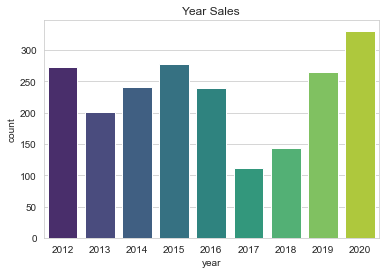

In [27]:
sns.countplot(x='year', data=df, palette='viridis')
plt.title('Year Sales');

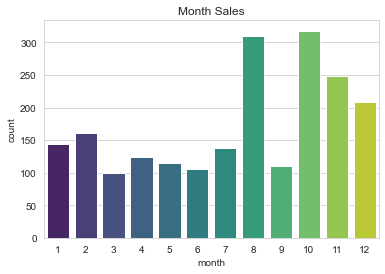

In [28]:
sns.countplot(x='month', data=df, palette='viridis')
plt.title('Month Sales');

Mostly in the middle of summer in the US (August) and near winter.

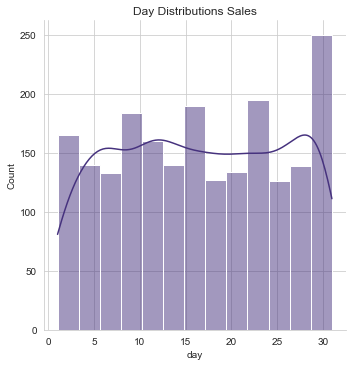

In [29]:
sns.displot(x='day', data=df, kde=True)
plt.title('Day Distributions Sales');

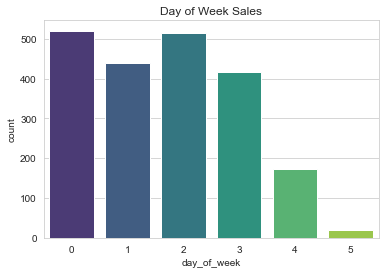

In [30]:
sns.countplot(x='day_of_week', data=df)
plt.title('Day of Week Sales');

Looks like there are no Sundays in our dataset.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**store_name**

In [32]:
df['store_name']

0          Giggle Juice Liquor Station, LLC
1           Fareway Stores #625 / Oskaloosa
2       Hy-Vee Food Store #1 / Cedar Rapids
3                        Hy-Vee / Urbandale
4                     Hy-Vee #5 / Davenport
                       ...                 
2395             Hy-Vee Food Store / Keokuk
2396     Hy-Vee Wine and Spirits / Humboldt
2398         Super Saver Liquor / Davenport
2399                         John's Grocery
2400         Hy-Vee Food Store / Coralville
Name: store_name, Length: 2083, dtype: object

In [33]:
df['store_name'].nunique()

599

In [34]:
df['store_name'].value_counts().head()

Central City 2                    74
Hy-Vee #3 / BDI / Des Moines      65
Sam's Club 8162 / Cedar Rapids    50
Benz Distributing                 41
Wilkie Liquors                    39
Name: store_name, dtype: int64

**address**

In [35]:
df['address'].sample(20)

887          2715 South 25th St
1094         3500 INGERSOLL AVE
150               303 N CODY RD
832                201 W 1st ST
481            4605 Fleur Drive
1764             501 7th Ave SE
1747    2605 BLAIRS FERRY RD NE
1988                 327 5TH ST
1085            1200 5th Ave NE
2012                735 MAIN ST
110              640 Lincolnway
1010          900 EAST MAIN ST.
782               700  29 ST SW
1676           5050 EDGEWOOD RD
1206              724  1ST ST E
656          1720 Waterfront Dr
1888              1122 BROADWAY
1071           5050 EDGEWOOD RD
1468               1031 West St
1006      20 WILSON AVENUE WEST
Name: address, dtype: object

In [36]:
df['address'].nunique()

751

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**city**

In [38]:
df['city'].sample(20)

0               Anamosa
2224          MUSCATINE
235        Cedar Rapids
493             Spencer
1971         WEST POINT
266            WATERLOO
186            Johnston
2359     Council Bluffs
2065            MORAVIA
1679           WATERLOO
1723       CEDAR RAPIDS
1040         DES MOINES
69          Cedar Falls
169               Pella
2120    Windsor Heights
1244               AMES
2325         Mason City
1997         DES MOINES
2208               AMES
1343     COUNCIL BLUFFS
Name: city, dtype: object

In [39]:
df['city'].nunique()

321

In [40]:
df['city'].value_counts().head()

DES MOINES        146
Des Moines        109
Cedar Rapids       95
CEDAR RAPIDS       76
Council Bluffs     47
Name: city, dtype: int64

For some reason, each value has an all-capitalized duplicate. We can solve this by change all values into lowercase.

In [41]:
df['city'] = df['city'].str.lower()

In [42]:
df['city'].value_counts().head()

des moines         255
cedar rapids       171
council bluffs      86
ames                81
west des moines     76
Name: city, dtype: int64

In [43]:
df['city'].nunique()

204

**zip_code**

In [44]:
df['zip_code'].sample(20)

1482    52411
2378    52742
241     52241
565     50702
296     52401
1989    50320
340     50010
1024    50613
1257    51401
1422    50501
1894    50588
1419    50317
1827    51301
2009    51501
961     51106
1837    50583
505     50701
837     51040
1143    52402
2224    52761
Name: zip_code, dtype: object

In [45]:
df['zip_code'].nunique()

234

**store_location**

In [46]:
df['store_location'].sample(20)

2216            POINT (-93.596754 41.554101)
402             POINT (-93.854477 41.615059)
234             POINT (-91.701581 42.030129)
427             POINT (-93.869892 42.035093)
353     POINT (-93.24163400000002 41.222471)
1957            POINT (-90.527081 41.559731)
1165            POINT (-93.718027 41.599172)
684             POINT (-93.739105 41.629364)
85              POINT (-91.136655 40.814666)
563             POINT (-93.806489 41.561342)
528     POINT (-94.15824700000002 42.504742)
121             POINT (-93.519187 41.598109)
946             POINT (-93.664182 41.586319)
631             POINT (-91.555044 41.486572)
1405             POINT (-91.60761 41.738129)
720              POINT (-91.60761 41.738129)
601             POINT (-93.035654 41.699173)
301              POINT (-93.613739 41.60572)
931             POINT (-91.608385 41.741097)
590             POINT (-91.528105 42.207428)
Name: store_location, dtype: object

Format: POINT (Longitude, Latitude)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**county**

In [48]:
df['county'].sample(20)

1928     Appanoose
415     BLACK HAWK
1813       Dubuque
641           POLK
2269       Dubuque
920     Black Hawk
1118       Wapello
1208          Polk
2257    BLACK HAWK
2060           Ida
1439         SIOUX
1483       AUDUBON
2259          Polk
720        Johnson
2171      Woodbury
671           LINN
1038        Benton
1909      Buchanan
1028         Story
571           Polk
Name: county, dtype: object

In [49]:
df['county'].nunique()

162

In [50]:
df['county'].value_counts().head()

Polk     244
POLK     170
LINN     118
Linn      98
Scott     77
Name: county, dtype: int64

Same as the previous problem, each value has an all-capitalized duplicate. We can solve this by change all values into lowercase.

In [51]:
df['county'] = df['county'].str.lower()

In [52]:
df['county'].value_counts().head()

polk          414
linn          216
johnson       145
scott         125
black hawk    105
Name: county, dtype: int64

In [53]:
df['county'].nunique()

94

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**category_name**

In [55]:
df['category_name'].sample(20)

1119                  Straight Rye Whiskies
1223                  STRAIGHT RYE WHISKIES
693                   Straight Rye Whiskies
807          DECANTERS & SPECIALTY PACKAGES
2112                     ROOT BEER SCHNAPPS
1696                        Coffee Liqueurs
1624                        COFFEE LIQUEURS
1493                               Gold Rum
1788    Imported Distilled Spirit Specialty
247                          IRISH WHISKIES
836                 TROPICAL FRUIT SCHNAPPS
1360                        100 PROOF VODKA
1682                        COFFEE LIQUEURS
2313                             Triple Sec
2026                         PEACH SCHNAPPS
640                     Special Order Items
650          DECANTERS & SPECIALTY PACKAGES
1219                  STRAIGHT RYE WHISKIES
138                   STRAIGHT RYE WHISKIES
264         Temporary &  Specialty Packages
Name: category_name, dtype: object

In [56]:
df['category_name'].nunique()

61

In [57]:
df['category_name'].value_counts()

DECANTERS & SPECIALTY PACKAGES    215
Triple Sec                        136
STRAIGHT RYE WHISKIES             124
Coffee Liqueurs                   121
Gold Rum                          105
                                 ... 
Iowa Distillery Whiskies            1
Delisted Items                      1
CORN WHISKIES                       1
Holiday VAP                         1
GREEN CREME DE MENTHE               1
Name: category_name, Length: 61, dtype: int64

**vendor_name**

In [58]:
df['vendor_name'].sample(20)

608             Brown-Forman Corporation
1315                      Luxco-St Louis
1618    Pernod Ricard USA/Austin Nichols
1368                           LUXCO INC
1329                      Luxco-St Louis
265                      Jim Beam Brands
1652                   PERNOD RICARD USA
1115                    Infinium Spirits
422                      BACARDI USA INC
597                      Jim Beam Brands
1997                     Jim Beam Brands
1283                    Infinium Spirits
50                  SAZERAC COMPANY  INC
2023                     Jim Beam Brands
1144                    Infinium Spirits
386             William Grant & Sons Inc
1533                   PERNOD RICARD USA
2387                    Infinium Spirits
205                 FIFTH GENERATION INC
210     Pernod Ricard USA/Austin Nichols
Name: vendor_name, dtype: object

In [59]:
df['vendor_name'].nunique()

95

In [60]:
df['vendor_name'].value_counts().head(30)

Jim Beam Brands                     318
Luxco-St Louis                      236
LUXCO INC                           231
Pernod Ricard USA/Austin Nichols    167
PERNOD RICARD USA                   146
Wilson Daniels Ltd.                 112
Infinium Spirits                     81
BACARDI USA INC                      76
SAZERAC COMPANY  INC                 73
Diageo Americas                      59
DIAGEO AMERICAS                      45
Sazerac Co., Inc.                    41
Moet Hennessy USA, Inc.              40
Heaven Hill Brands                   35
Sazerac North America                32
SAZERAC NORTH AMERICA                29
Mccormick Distilling Company         29
OLE SMOKY DISTILLERY LLC             26
MHW Ltd                              18
Mhw LTD                              15
MOET HENNESSY USA                    13
Constellation Wine Company, Inc.     12
Phillips Beverage Company            12
McCormick Distilling Co.             10
Brown-Forman Corporation             10


In [61]:
df['vendor_name'] = df['vendor_name'].str.lower()

In [62]:
df['vendor_name'].value_counts().head(30)

jim beam brands                     318
luxco-st louis                      236
luxco inc                           231
pernod ricard usa/austin nichols    167
pernod ricard usa                   146
wilson daniels ltd.                 112
diageo americas                     104
infinium spirits                     81
bacardi usa inc                      76
sazerac company  inc                 73
sazerac north america                61
sazerac co., inc.                    41
moet hennessy usa, inc.              40
heaven hill brands                   35
mhw ltd                              33
mccormick distilling company         29
ole smoky distillery llc             26
moet hennessy usa                    13
phillips beverage company            12
constellation wine company, inc.     12
sidney frank importing co.           10
mccormick distilling co.             10
cedar ridge vineyards ll             10
brown-forman corporation             10
william grant & sons inc              9


In [63]:
df['vendor_name'].nunique()

89

**item_description**

In [64]:
df['item_description'].sample(20)

858     Evan Williams Peppermint Chocolate Egg Nog
1166                                 Templeton Rye
350                                  Hawkeye Vodka
876                          Christian Bros Brandy
70                      Saints N Sinners Apple Pie
1921                            Dekuyper Hot Damn!
2119                           Dekuyper Triple Sec
996                                 Glenlivet 12YR
171                                 Bulleit 95 Rye
797                        Bushmills Irish Whiskey
1322                     Hawkeye Vodka 80 Prf Mini
1844                            Paramount Amaretto
2265                             Juarez Triple Sec
1710                               Juarez Gold Dss
1316                     Hawkeye Vodka 80 Prf Mini
1559                                 Kahlua Coffee
1639                         Kahlua Coffee Liqueur
2015                            Dekuyper Peachtree
2138                           Dekuyper Triple Sec
399               SOOH Jinro Ch

In [65]:
df['item_description'].nunique()

399

In [66]:
df['item_description'].value_counts()

Templeton Rye                                            112
Juarez Triple Sec                                        103
Jameson                                                   79
Juarez Gold Dss                                           78
Dekuyper Peachtree                                        59
                                                        ... 
Dr McGillicuddy's Butterscotch                             1
The Glenlivet                                              1
Jose Cuervo Authentic Lime Margarita 4pk Cans              1
Woodford Reserve Rye                                       1
Cedar Ridge Private Cask Iowa Bourbon Selection 92prf      1
Name: item_description, Length: 399, dtype: int64

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**pack**

In [68]:
df['pack'].sample(20)

1588    12
597     12
1978    12
2000    12
987     12
1987    12
1053    12
2288    12
2399     6
346      6
2214    12
1806    12
1080    12
930     12
795     12
44      10
952      6
2377    12
1259     6
1704    12
Name: pack, dtype: int64

In [69]:
df['pack'].nunique()

13

In [70]:
df['pack'].value_counts()

12    1290
6      572
24     109
10      25
8       24
48      24
3       14
4       10
20       7
5        3
30       2
1        2
15       1
Name: pack, dtype: int64

We will treat this attribute as object

**bottle_volume_ml**

In [71]:
df['bottle_volume_ml'].sample(20)

622     1000
934     1000
2301    1000
1626    1000
69        50
952      850
407      750
584     1000
272      100
537      750
1029    1000
1342     750
534      750
26       750
1623    1000
634      200
1510    1750
1231     750
2344    1000
2019    1000
Name: bottle_volume_ml, dtype: int64

In [72]:
df['bottle_volume_ml'].nunique()

23

In [73]:
df['bottle_volume_ml'].value_counts().head()

1000    948
750     562
1750    137
375     122
50       91
Name: bottle_volume_ml, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**state_bottle_cost**

In [75]:
df['state_bottle_cost']

0          5.75
1         10.50
2         10.07
3       6100.00
4         19.33
         ...   
2395      22.49
2396      22.49
2398      22.49
2399      22.49
2400      22.49
Name: state_bottle_cost, Length: 2083, dtype: float64

In [76]:
df['state_bottle_cost'].nunique()

349

In [77]:
df['state_bottle_cost'].value_counts().head()

7.62     114
18.08     80
2.42      79
18.09     64
7.35      59
Name: state_bottle_cost, dtype: int64

**state_bottle_retail**

In [78]:
df['state_bottle_retail']

0          8.63
1         15.75
2         15.11
3       9150.00
4         29.00
         ...   
2395      33.74
2396      33.74
2398      33.74
2399      33.74
2400      33.74
Name: state_bottle_retail, Length: 2083, dtype: float64

In [79]:
df['state_bottle_retail'].nunique()

357

In [80]:
df['state_bottle_retail'].value_counts().head()

11.43    114
27.13     80
3.63      79
27.14     64
11.02     55
Name: state_bottle_retail, dtype: int64

In [81]:
df[['state_bottle_cost', 'state_bottle_retail']].head(10)

,state_bottle_cost,state_bottle_retail
0,5.75,8.63
1,10.50,15.75
2,10.07,15.11
3,6100.00,9150.00
4,19.33,29.00
5,33.60,50.40
6,20.47,30.71
7,13.25,19.88
8,15.74,23.61
9,3.05,4.58


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

**bottles_sold**

In [83]:
df['bottles_sold']

0        1
1       60
2       36
3        1
4       18
        ..
2395     6
2396     3
2398     6
2399     6
2400    12
Name: bottles_sold, Length: 2083, dtype: int64

In [84]:
df['bottles_sold'].nunique()

72

In [85]:
df[['pack', 'bottles_sold']].sample(20)

,pack,bottles_sold
2292,12,5
480,6,720
1263,6,18
1039,12,120
295,12,36
1536,12,2
729,24,5
556,12,4
984,12,2
1075,12,4


**sale_dollars**

In [86]:
df['sale_dollars']

0          8.63
1        945.00
2        543.96
3       9150.00
4        522.00
         ...   
2395     202.44
2396     101.22
2398     202.44
2399     202.44
2400     404.88
Name: sale_dollars, Length: 2083, dtype: float64

In [87]:
df['sale_dollars'].nunique()

891

**volume_sold_liters**

In [88]:
df['volume_sold_liters']

0         0.37
1        22.50
2        27.00
3       180.00
4        13.50
         ...  
2395      0.30
2396      0.15
2398      0.30
2399      0.30
2400      0.60
Name: volume_sold_liters, Length: 2083, dtype: float64

In [89]:
df['volume_sold_liters'].nunique()

154

In [90]:
df['volume_sold_liters'].value_counts()

4.00      315
2.00      121
22.50     113
27.00     104
48.00      91
         ... 
162.00      1
4.80        1
17.00       1
78.75       1
140.40      1
Name: volume_sold_liters, Length: 154, dtype: int64

**volume_sold_gallons**

In [91]:
df['volume_sold_gallons']

0        0.09
1        5.94
2        7.13
3       47.55
4        3.57
        ...  
2395     0.07
2396     0.03
2398     0.07
2399     0.07
2400     0.15
Name: volume_sold_gallons, Length: 2083, dtype: float64

In [92]:
df['volume_sold_gallons'].nunique()

170

In [93]:
df['volume_sold_gallons'].value_counts()

1.06      281
0.52      123
5.94      113
7.13      104
12.68      91
         ... 
118.87      1
22.59       1
106.99      1
20.20       1
4.49        1
Name: volume_sold_gallons, Length: 170, dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  2083 non-null   object        
 1   date                     2083 non-null   datetime64[ns]
 2   store_number             2083 non-null   object        
 3   store_name               2083 non-null   object        
 4   address                  2083 non-null   object        
 5   city                     2083 non-null   object        
 6   zip_code                 2083 non-null   object        
 7   store_location           2083 non-null   object        
 8   county_number            2083 non-null   object        
 9   county                   2083 non-null   object        
 10  category                 2083 non-null   object        
 11  category_name            2083 non-null   object        
 12  vendor_number            2083 non-

Now that we have briefly explored our data, we will drop some of these attributes and focus more on few numbers of attributes.

<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

In [182]:
df2 = df.copy()

In [183]:
df2.drop(['invoice_and_item_number',
          'date',
          'store_number',
          'address',
          'county_number',
          'category',
          'vendor_number',
          'item_number'], axis=1, inplace=True)

In [184]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2083 non-null   object 
 1   city                 2083 non-null   object 
 2   zip_code             2083 non-null   object 
 3   store_location       2083 non-null   object 
 4   county               2083 non-null   object 
 5   category_name        2083 non-null   object 
 6   vendor_name          2083 non-null   object 
 7   item_description     2083 non-null   object 
 8   pack                 2083 non-null   int64  
 9   bottle_volume_ml     2083 non-null   int64  
 10  state_bottle_cost    2083 non-null   float64
 11  state_bottle_retail  2083 non-null   float64
 12  bottles_sold         2083 non-null   int64  
 13  sale_dollars         2083 non-null   float64
 14  volume_sold_liters   2083 non-null   float64
 15  volume_sold_gallons  2083 non-null   f

What we have done so far:
* Extracted year, month, day, and day of week from `date`
* Lowercased `city`, `county`, and `vendor_name`
* Dropped `invoice_and_item_number`, `date`, `store_number`, `address`, `county_number`, `category`, `vendor_number`, `item_number`.

This data has many columns and sometimes it's hard to keep track of what we did or what we should do to the attribute. There's no header collapsing in Jupyter Notebook, so scrolling back and forth can also be quite tiring.

## Further Feature Engineering

In [185]:
import warnings
warnings.filterwarnings('ignore')

**store_name**

In [186]:
df2['store_name'].sample(20)

1977                             Graettinger Market
1342                   The Liquor Store / Davenport
480                        Sam's Club 6979 / Ankeny
1247                                 John's Grocery
1234                                 Central City 2
158               Hy-Vee Drugstore / Council Bluffs
1230                   Wal-Mart 0581 / Marshalltown
465                  The Station II / North Liberty
1891                            Super Valu / Mark's
1416    Smokin' Joe's #12 Tobacco and Liquor Outlet
2382                    Liquor and Tobacco Outlet /
560                   Hy-Vee Wine and Spirits / WDM
2037              Sam's Club 6344 / Windsor Heights
1824                    Sam's Club 8238 / Davenport
1689                                   Hubers Store
1004           Hy-Vee Food and Drug #6 / Cedar Rapi
781                    Hy-Vee #3 / BDI / Des Moines
2191                                 Central City 2
2387                   I-80 Liquor / Council Bluffs
2372        

Most of the strings contain ([the store name][branch] # / [city]). We will split the strings and not include the city name.

In [187]:
df2['store_name'].nunique()

599

In [188]:
df2['store_name'] = df2['store_name'].str.lower()
df2['store_name'] = df2['store_name'].str.split(' / ').str[0]
df2['store_name'] = df2['store_name'].str.split('/').str[0]
df2['store_name'] = df2['store_name'].str.split(' #').str[0]

In [189]:
df2['store_name'].loc[df2.store_name.str.contains('hy-vee')] = 'hy-vee'
df2['store_name'].loc[df2.store_name.str.contains('central city')] = 'central city'
df2['store_name'].loc[df2.store_name.str.contains("sam's club")] = "sam's club"
df2['store_name'].loc[df2.store_name.str.contains('wal-mart')] = 'wal-mart'
df2['store_name'].loc[df2.store_name.str.contains('target')] = 'target'
df2['store_name'].loc[df2.store_name.str.contains('world liquor')] = 'world liquor & tobacco + vape'

In [190]:
df2['store_name'].value_counts().head(20)

hy-vee                           646
sam's club                       185
central city                     102
wal-mart                          84
fareway stores                    70
costco wholesale                  44
benz distributing                 41
wilkie liquors                    39
smokin' joe's                     22
casey's general store             21
lot-a-spirits                     18
keokuk spirits                    18
cyclone liquors                   17
ingersoll liquor and beverage     15
quick shop                        15
target                            15
i-80 liquor                       15
sonny's super market              14
kum & go                          14
tobacco shop                      11
Name: store_name, dtype: int64

In [191]:
df2['store_name'].nunique()

309

So far we've managed to reduce the unique values from 599 to 309. There are still so many instances with 1 value. There could be more duplicates, but for now, we've done what we could.

In [192]:
df2['store_name'].value_counts().tail(20)

pronto                                   1
riverside quick shop                     1
randy's neighborhood market              1
kwik stop food mart                      1
xo food and liquor                       1
the boonedocks                           1
new star liquor & tobacco                1
super saver liquor llc                   1
crossroads wine and liquor               1
tobacco 4 less                           1
kwik stop 16th st                        1
the party pantry                         1
super saver liquor -muscatine            1
kroegers liquor co llc                   1
northside liquor                         1
s&b farmstead distillery                 1
liquor tobacco & grocery - mason city    1
liquor barn ii                           1
no frills supermarkets                   1
super saver liquor                       1
Name: store_name, dtype: int64

**category_name**

In [193]:
df2['category_name'].nunique()

61

In [194]:
df2['category_name'] = df2['category_name'].str.lower()

In [195]:
df2['category_name'].nunique()

54

In [196]:
df2['category_name'].value_counts().head(10)

triple sec                             225
straight rye whiskies                  219
decanters & specialty packages         215
coffee liqueurs                        170
gold rum                               105
irish whiskies                          98
single malt scotch                      87
distilled spirits specialty             83
imported distilled spirit specialty     81
special order items                     71
Name: category_name, dtype: int64

We managed to reduce more unique values by lowering the characters.

**vendor_name**

In [197]:
df2['vendor_name'].nunique()

89

In [198]:
df2['vendor_name'].value_counts().head(45)

jim beam brands                         318
luxco-st louis                          236
luxco inc                               231
pernod ricard usa/austin nichols        167
pernod ricard usa                       146
wilson daniels ltd.                     112
diageo americas                         104
infinium spirits                         81
bacardi usa inc                          76
sazerac company  inc                     73
sazerac north america                    61
sazerac co., inc.                        41
moet hennessy usa, inc.                  40
heaven hill brands                       35
mhw ltd                                  33
mccormick distilling company             29
ole smoky distillery llc                 26
moet hennessy usa                        13
phillips beverage company                12
constellation wine company, inc.         12
sidney frank importing co.               10
mccormick distilling co.                 10
cedar ridge vineyards ll        

In [199]:
df2['vendor_name'].value_counts().tail(45)

fifth generation inc                      4
four roses distillery                     4
green frog distillery, llc                3
the patron spirits company                3
skyy spirits inc                          3
fredrick wildman & son                    3
stoli group                               3
constellation brands inc                  3
laird and company                         3
yahara bay distillers, inc                2
ole smoky distillery, llc                 2
disaronno international                   2
worldwide libations, llc                  2
s&b farmstead distillery                  2
prost beverage company                    2
dehner distillery                         2
castle brands                             2
bacardi u.s.a., inc.                      2
w j deutsch & sons ltd                    2
s&b farms distillery                      2
goamericago beverages llc / whistlepig    2
prestige wine & spirits group             2
shaw-ross international         

This attribute is even worse. So many small differences like '&' and 'and' or one with a comma and not.

In [200]:
df2['vendor_name'].loc[df2.vendor_name.str.contains('luxco')] = 'luxco inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('pernod ricard usa')] = 'pernod ricard usa'
df2['vendor_name'].loc[df2.vendor_name.str.contains('gunsandmore')] = 'gunsandmore'
df2['vendor_name'].loc[df2.vendor_name.str.contains('mccormick distilling')] = 'mccormick distilling co'
df2['vendor_name'].loc[df2.vendor_name.str.contains('sazerac')] = 'sazerac company  inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('mississippi river')] = 'mississippi river distilling co'
df2['vendor_name'].loc[df2.vendor_name.str.contains('phillips beverage')] = 'phillips beverage company'
df2['vendor_name'].loc[df2.vendor_name.str.contains('constellation')] = 'constellation wine company'
df2['vendor_name'].loc[df2.vendor_name.str.contains('william grant')] = 'william grant & sons inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('cedar ridge vineyards')] = 'cedar ridge vineyards llc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('prestige wine')] = 'prestige wine & spirits group'
df2['vendor_name'].loc[df2.vendor_name.str.contains('ole smoky')] = 'ole smoky distillery'
df2['vendor_name'].loc[df2.vendor_name.str.contains('laird')] = 'laird & company'
df2['vendor_name'].loc[df2.vendor_name.str.contains('gallo winery')] = 'e & j gallo winery'
df2['vendor_name'].loc[df2.vendor_name.str.contains('s&b farms')] = 's&b farms distillery'
df2['vendor_name'].loc[df2.vendor_name.str.contains('fifth generation')] = 'fifth generation inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('yahara bay distillers')] = 'yahara bay distillers inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('bacardi')] = 'bacardi usa inc'
df2['vendor_name'].loc[df2.vendor_name.str.contains('forman')] = 'brown-forman corporation'
df2['vendor_name'].loc[df2.vendor_name.str.contains('dunkel corporation')] = 'dunkel corporation'

In [201]:
df2['vendor_name'].nunique()

68

We managed to reduce the unique values from 89 to 68.\
Note: This process was really tedious and need good eyes for spotting the duplicates and also not to mention, time. We might had missed some duplicates.

**item_description**

In [202]:
df2['item_description'].sample(40)

1706                             Juarez Gold Dss
2361    Ole Smoky Apple Pie Moonshine 70prf Mini
805                     Hennessy VS Flask Sleeve
1647                       Kahlua Coffee Liqueur
1839                          Paramount Amaretto
66                Dekuyper Grape Pucker Schnapps
932                     Glenmorangie Taster Pack
942                           Members Mark Vodka
1020                                     Jameson
555                               Knob Creek Rye
601              Absolut w/50ml Citron & Mandrin
244                         Powers Irish Whiskey
1778                             Juarez Gold Dss
2277                         La Prima Triple Sec
1462                                Bacardi Gold
712                         Williams Pear Brandy
1717                             Juarez Gold Dss
70                    Saints N Sinners Apple Pie
199                      Paramount Cherry Brandy
1694                       Kamora Coffee Liqueur
2054                

In [203]:
df2['item_description'].nunique()

399

In [204]:
df2['item_description'] = df2['item_description'].str.lower()

In [205]:
df2['item_description'].nunique()

394

In [206]:
df2['category_name'].sample(30)

694                   straight rye whiskies
1865    imported distilled spirit specialty
2306                             triple sec
597                           aged dark rum
1813            distilled spirits specialty
956                      single malt scotch
1131                  straight rye whiskies
2137                             triple sec
244                          irish whiskies
535                     special order items
1886            distilled spirits specialty
1906                         apple schnapps
276          decanters & specialty packages
512                                  mezcal
615          decanters & specialty packages
450                                  mezcal
533          decanters & specialty packages
563                      single malt scotch
2059                    watermelon schnapps
684                     special order items
1412                               gold rum
1628                        coffee liqueurs
1836                      americ

In [207]:
df2[['category_name', 'item_description']].head(30)

,category_name,item_description
0,cocktails / rtd,tooters ala bama slama
1,distilled spirits specialty,sipp'n sweet corn
2,aged dark rum,cross keys rum
3,corn whiskies,cedar ridge malted rye barrel urbandale
4,straight rye whiskies,cody road rye
5,single malt scotch,balvenie 12yr doublewood single malt scotch
6,decanters & specialty packages,knob creek w/2-50mls
7,decanters & specialty packages,bailey's original irish cream w/4 shot glasses
8,decanters & specialty packages,maker's mark recipe and glasses
9,peach brandies,paul masson peach grande amber brandy


In [209]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 0 to 2400
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2083 non-null   object 
 1   city                 2083 non-null   object 
 2   zip_code             2083 non-null   object 
 3   store_location       2083 non-null   object 
 4   county               2083 non-null   object 
 5   category_name        2083 non-null   object 
 6   vendor_name          2083 non-null   object 
 7   item_description     2083 non-null   object 
 8   pack                 2083 non-null   int64  
 9   bottle_volume_ml     2083 non-null   int64  
 10  state_bottle_cost    2083 non-null   float64
 11  state_bottle_retail  2083 non-null   float64
 12  bottles_sold         2083 non-null   int64  
 13  sale_dollars         2083 non-null   float64
 14  volume_sold_liters   2083 non-null   float64
 15  volume_sold_gallons  2083 non-null   f

In [210]:
df2[['store_name', 'city', 'zip_code', 'store_location', 'county', 'category_name', 'vendor_name', 'item_description']]

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description
0,"giggle juice liquor station, llc",anamosa,52205,POINT (-91.29083400000002 42.108203),jones,cocktails / rtd,mango bottling,tooters ala bama slama
1,fareway stores,oskaloosa,52577,POINT (-92.648062 41.292614),mahaska,distilled spirits specialty,gunsandmore,sipp'n sweet corn
2,hy-vee,cedar rapids,52405,POINT (-91.697941 41.97447),linn,aged dark rum,phillips beverage company,cross keys rum
3,hy-vee,urbandale,50322,POINT (-93.739105 41.629364),polk,corn whiskies,cedar ridge vineyards llc,cedar ridge malted rye barrel urbandale
4,hy-vee,davenport,52804,POINT (-90.611972 41.538207),scott,straight rye whiskies,mississippi river distilling co,cody road rye
...,...,...,...,...,...,...,...,...
2395,hy-vee,keokuk,52632,POINT (-91.403752 40.41538),lee,temporary & specialty packages,diageo americas,crown royal multibrand advent calendar
2396,hy-vee,humboldt,50548,POINT (-94.227116 42.733221),humboldt,temporary & specialty packages,diageo americas,crown royal multibrand advent calendar
2398,super saver liquor,davenport,52802,POINT (-90.599327 41.520231),scott,temporary & specialty packages,diageo americas,crown royal multibrand advent calendar
2399,john's grocery,iowa city,52240,POINT (-91.529854 41.663541),johnson,temporary & specialty packages,diageo americas,crown royal multibrand advent calendar


Now that we have cleaned our data, let's save the updated dataset into our local machine.

In [218]:
df2.to_csv('data-cleaned.csv', index=False)

<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

# Data Visualization

We did what we could to manipulate our data . But we haven't done any visualization on our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data-cleaned.csv')
df.head()

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
0,"giggle juice liquor station, llc",anamosa,52205,POINT (-91.29083400000002 42.108203),jones,cocktails / rtd,mango bottling,tooters ala bama slama,12,375,5.75,8.63,1,8.63,0.37,0.09,2016,8,29,0
1,fareway stores,oskaloosa,52577,POINT (-92.648062 41.292614),mahaska,distilled spirits specialty,gunsandmore,sipp'n sweet corn,12,375,10.50,15.75,60,945.00,22.50,5.94,2012,9,5,2
2,hy-vee,cedar rapids,52405,POINT (-91.697941 41.97447),linn,aged dark rum,phillips beverage company,cross keys rum,12,750,10.07,15.11,36,543.96,27.00,7.13,2019,11,4,0
3,hy-vee,urbandale,50322,POINT (-93.739105 41.629364),polk,corn whiskies,cedar ridge vineyards llc,cedar ridge malted rye barrel urbandale,1,180000,6100.00,9150.00,1,9150.00,180.00,47.55,2015,12,3,3
4,hy-vee,davenport,52804,POINT (-90.611972 41.538207),scott,straight rye whiskies,mississippi river distilling co,cody road rye,6,750,19.33,29.00,18,522.00,13.50,3.57,2012,11,29,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2083 non-null   object 
 1   city                 2083 non-null   object 
 2   zip_code             2083 non-null   object 
 3   store_location       2083 non-null   object 
 4   county               2083 non-null   object 
 5   category_name        2083 non-null   object 
 6   vendor_name          2083 non-null   object 
 7   item_description     2083 non-null   object 
 8   pack                 2083 non-null   int64  
 9   bottle_volume_ml     2083 non-null   int64  
 10  state_bottle_cost    2083 non-null   float64
 11  state_bottle_retail  2083 non-null   float64
 12  bottles_sold         2083 non-null   int64  
 13  sale_dollars         2083 non-null   float64
 14  volume_sold_liters   2083 non-null   float64
 15  volume_sold_gallons  2083 non-null   f

In [5]:
df.describe()

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
count,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000
mean,11.251080,960.681709,13.736558,20.612847,48.663466,717.103529,47.428406,12.527571,2016.030245,7.362458,16.472396,1.685070
std,5.797399,3944.619847,133.710601,200.566039,93.909575,1639.110868,103.632972,27.377013,2.753488,3.466967,8.993251,1.314116
min,1.000000,50.000000,0.890000,1.340000,1.000000,0.000000,0.100000,0.020000,2012.000000,1.000000,1.000000,0.000000
25%,6.000000,750.000000,4.750000,7.130000,4.000000,45.720000,4.000000,1.060000,2014.000000,4.000000,9.000000,1.000000
50%,12.000000,1000.000000,7.620000,11.430000,18.000000,206.880000,13.500000,3.570000,2016.000000,8.000000,16.000000,2.000000
75%,12.000000,1000.000000,15.250000,22.870000,60.000000,776.520000,48.000000,12.680000,2019.000000,10.000000,24.000000,3.000000
max,48.000000,180000.000000,6100.000000,9150.000000,768.000000,31260.000000,1260.000000,332.860000,2020.000000,12.000000,31.000000,5.000000


In [6]:
# sns.pairplot(df)

Pairplot is used to get the general plot of our data. The larger the data the longer it will take to proceed. Open the image in new tab to zoom in.

**sale_dollars vs bottles_sold**

<AxesSubplot:xlabel='sale_dollars', ylabel='bottles_sold'>

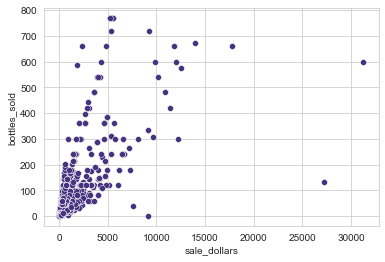

In [7]:
sns.scatterplot(x='sale_dollars', y='bottles_sold', data=df)

There are some outliers above 25000 dollars. Let's try to exclude these outliers to get a better look at our plot.

In [8]:
df[df['sale_dollars'] > 25000]

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
407,templeton distilling llc,templeton,51463,POINT (-94.936366 41.917072),carroll,corn whiskies,templeton distilling llc,templeton straight corn whiskey,6,750,34.73,52.10,600,31260.00,450.0,118.87,2020,8,13,3
663,hy-vee,cedar rapids,52405,POINT (-91.697941 41.97447),linn,decanters & specialty packages,pernod ricard usa,absolut w/4-50mls,1,750,137.13,206.07,132,27201.24,99.0,26.15,2013,10,9,2


(0.0, 18500.0)

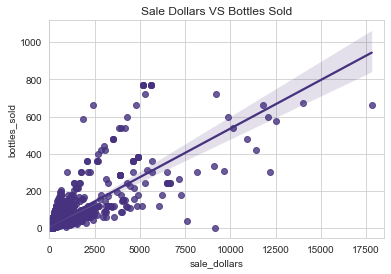

In [9]:
sns.regplot(x='sale_dollars', y='bottles_sold',
            data=df[df['sale_dollars'] < 25000])
plt.title('Sale Dollars VS Bottles Sold')
plt.xlim(0, 18500)

Text(0.5, 1.0, 'Sale Dollars VS Bottles Sold')

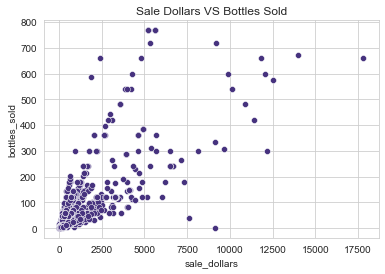

In [10]:
sns.scatterplot(x='sale_dollars', y='bottles_sold',
            data=df[df['sale_dollars'] < 25000])
plt.title('Sale Dollars VS Bottles Sold')

Text(0.5, 1.0, 'Sale Dollars VS Bottles Sold')

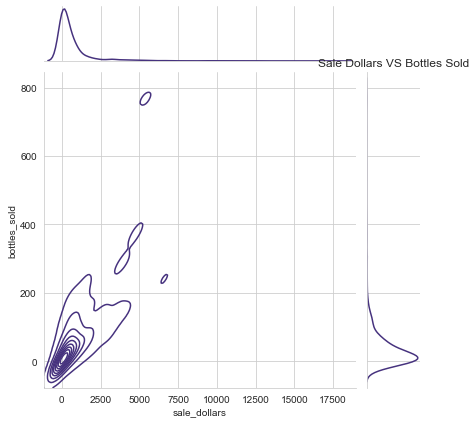

In [11]:
sns.jointplot(x='sale_dollars', y='bottles_sold',
              data=df[df['sale_dollars'] < 25000],
              kind='kde')
plt.title('Sale Dollars VS Bottles Sold')

**sale_dollars vs volume_sold_liters**

<AxesSubplot:xlabel='sale_dollars', ylabel='volume_sold_liters'>

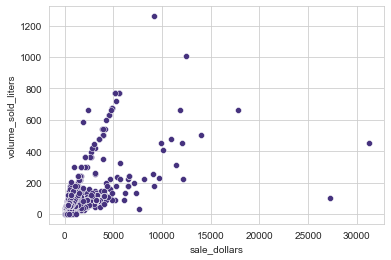

In [12]:
sns.scatterplot(x='sale_dollars', y='volume_sold_liters', data=df)

(0.0, 18500.0)

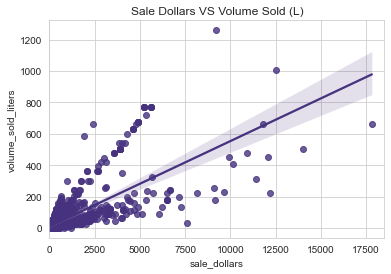

In [13]:
sns.regplot(x='sale_dollars', y='volume_sold_liters',
            data=df[df['sale_dollars'] < 25000])
plt.title('Sale Dollars VS Volume Sold (L)')
plt.xlim(0, 18500)

Text(0.5, 1.0, 'Sale Dollars VS Volume Sold (L)')

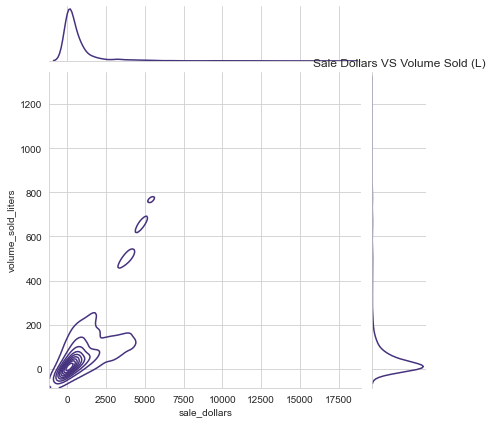

In [14]:
sns.jointplot(x='sale_dollars', y='volume_sold_liters',
              data=df[df['sale_dollars'] < 25000],
              kind='kde')
plt.title('Sale Dollars VS Volume Sold (L)')

The data is centered at relatively few bottles and cheap price.

**sale_dollars vs date objects**

Text(0.5, 1.0, 'Sale Dollars per Year')

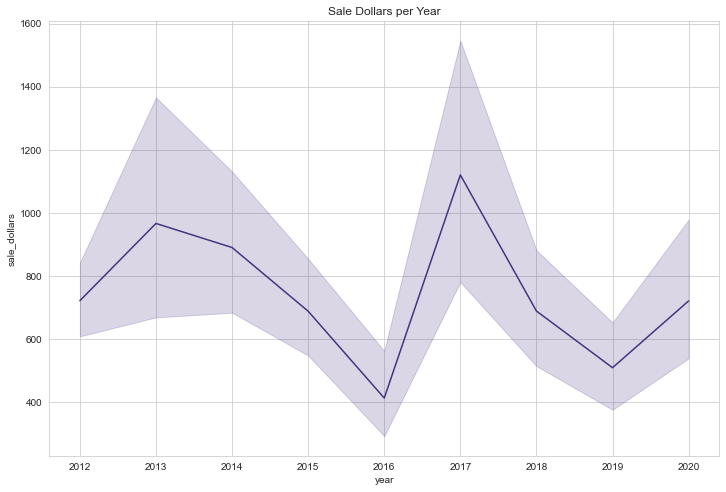

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='sale_dollars', data=df)
plt.title('Sale Dollars per Year')

What happened in 2016 and 2017?

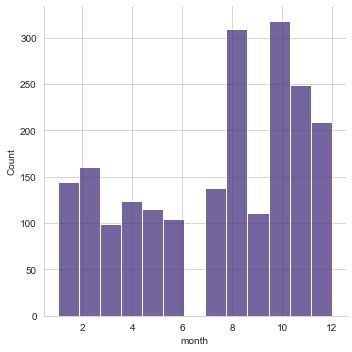

In [16]:
sns.displot(x='month', data=df)

In [17]:
df[df['month']==7].head()

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
41,"liquor barn, inc.",hampton,50441,POINT (-93.21693 42.741728),franklin,aged dark rum,bacardi usa inc,bacardi black,6,1750,15.00,22.50,30,675.00,52.5,13.87,2017,7,21,4
42,fareway stores,charles city,50616,POINT (-92.674449 43.052712),floyd,decanters & specialty packages,prestige wine & spirits group,kinky vodka martini pack,6,3600,10.00,15.00,12,180.00,43.2,11.41,2015,7,21,1
54,cork and bottle,oskaloosa,52577,POINT (-92.648153 41.296228),mahaska,straight rye whiskies,diageo americas,bulleit 95 rye,12,1000,20.49,30.74,2,59.98,2.0,0.52,2019,7,17,2
55,central city,des moines,50314,POINT (-93.613739 41.60572),polk,straight rye whiskies,jim beam brands,old overholt rye,12,750,11.54,17.31,24,415.44,18.0,4.75,2019,7,1,0
59,"elliott's general store,",moravia,52571,POINT (-92.834054 40.892417),appanoose,tropical fruit schnapps,sazerac company inc,maui blue hawaiian schnapps,12,1000,4.54,6.81,4,27.24,4.0,1.06,2012,7,25,2


Not sure why there is no bar for month 7. Let's try to plot it with line.

Text(0.5, 1.0, 'Sale Dollars per Month')

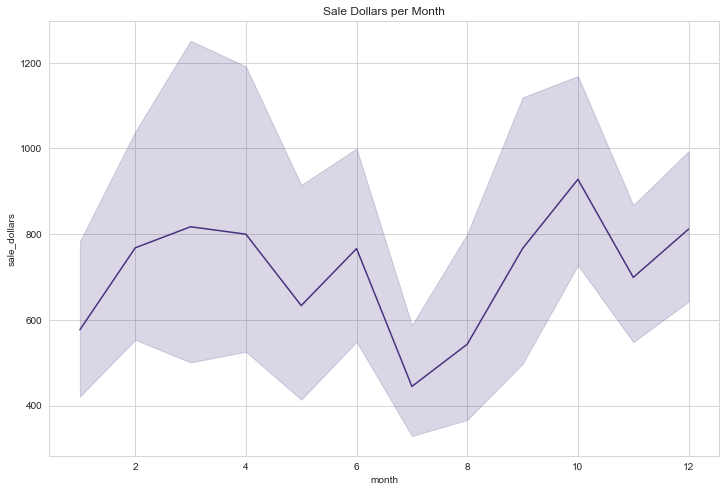

In [18]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='sale_dollars', data=df)
plt.title('Sale Dollars per Month')

The data per month is too spread out, but the general trend is that the average high sales is on October.

Text(0.5, 1.0, 'Sale Dollars per Day')

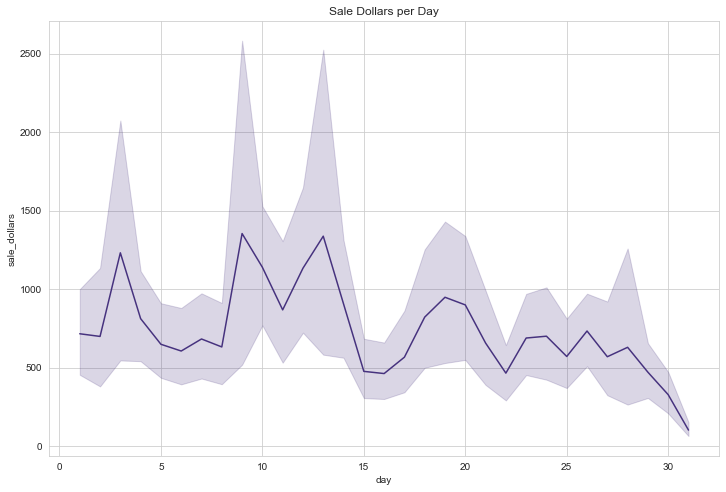

In [19]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='day', y='sale_dollars', data=df)
plt.title('Sale Dollars per Day')

Looks like the average high sales is at the start of the month or in the middle and going downhill towards the end. Guess this lines up with monthly salary.

Text(0.5, 0, 'day_of_week (mon=0, sun=6)')

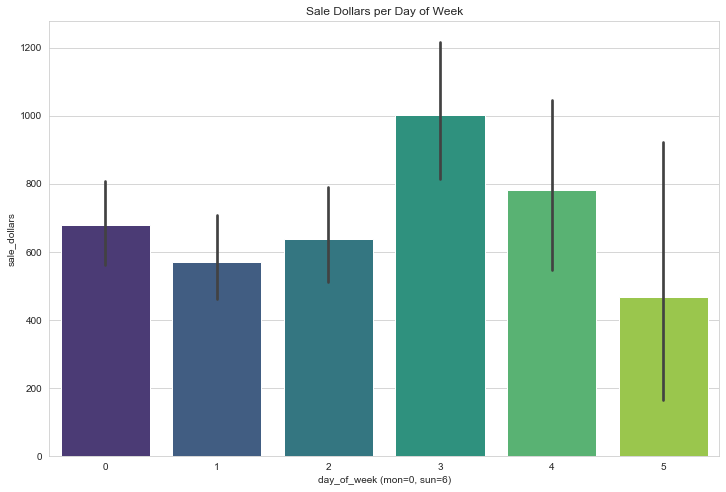

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(x='day_of_week', y='sale_dollars', data=df)
plt.title('Sale Dollars per Day of Week')
plt.xlabel('day_of_week (mon=0, sun=6)')

In [21]:
df[df['day_of_week']==6]

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week


Why are there no Sundays in our data?\
There is a law in USA called Blue Law. Many states prohibit selling alcohol for on and off-premises sales in one form or another on Sundays at some restricted time, under the idea that people should be in church on Sunday morning, or at least not drinking.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2083 non-null   object 
 1   city                 2083 non-null   object 
 2   zip_code             2083 non-null   object 
 3   store_location       2083 non-null   object 
 4   county               2083 non-null   object 
 5   category_name        2083 non-null   object 
 6   vendor_name          2083 non-null   object 
 7   item_description     2083 non-null   object 
 8   pack                 2083 non-null   int64  
 9   bottle_volume_ml     2083 non-null   int64  
 10  state_bottle_cost    2083 non-null   float64
 11  state_bottle_retail  2083 non-null   float64
 12  bottles_sold         2083 non-null   int64  
 13  sale_dollars         2083 non-null   float64
 14  volume_sold_liters   2083 non-null   float64
 15  volume_sold_gallons  2083 non-null   f

**Mapping store_location**

In [23]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon

sns.set_style('white')

In [24]:
df['store_location']

0        POINT (-91.29083400000002 42.108203)
1                POINT (-92.648062 41.292614)
2                 POINT (-91.697941 41.97447)
3                POINT (-93.739105 41.629364)
4                POINT (-90.611972 41.538207)
                        ...                  
2078              POINT (-91.403752 40.41538)
2079             POINT (-94.227116 42.733221)
2080             POINT (-90.599327 41.520231)
2081             POINT (-91.529854 41.663541)
2082    POINT (-91.591868 41.682337000000004)
Name: store_location, Length: 2083, dtype: object

We'll download Iowa county boundaries data from [here](https://data.iowa.gov/Boundaries/County-Boundaries-of-Iowa/jda9-pbm6).

In [25]:
iowa = pd.read_csv('County_Boundaries_of_Iowa.csv')
iowa.head()

,GNIS Feature ID,FIPS County Code,State County Number,County Name,Geometry,Acres
0,465248,19119,60,Lyon,MULTIPOLYGON (((-96.59915441845389 43.50033354...,376538.0
1,465260,19143,72,Osceola,MULTIPOLYGON (((-95.86089025238238 43.49997867...,255640.2
2,465218,19059,30,Dickinson,MULTIPOLYGON (((-95.38780740566654 43.50024333...,258457.9
3,465220,19063,32,Emmet,MULTIPOLYGON (((-94.91475795884911 43.50086659...,257552.5
4,465283,19189,95,Winnebago,MULTIPOLYGON (((-93.97090631149868 43.49979007...,256789.0


In [26]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GNIS Feature ID      99 non-null     int64  
 1   FIPS County Code     99 non-null     int64  
 2   State County Number  99 non-null     int64  
 3   County Name          99 non-null     object 
 4   Geometry             99 non-null     object 
 5   Acres                99 non-null     float64
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


What we should focus more is on `Geometry`. To use the attribute, we will need to convert the data type to geometry.

In [27]:
from shapely import wkt

iowa['Geometry'] = iowa['Geometry'].apply(wkt.loads)

In [28]:
iowa.set_geometry('Geometry')

,GNIS Feature ID,FIPS County Code,State County Number,County Name,Geometry,Acres
0,465248,19119,60,Lyon,"MULTIPOLYGON (((-96.59915 43.50033, -96.58647 ...",376538.0
1,465260,19143,72,Osceola,"MULTIPOLYGON (((-95.86089 43.49998, -95.84104 ...",255640.2
2,465218,19059,30,Dickinson,"MULTIPOLYGON (((-95.38781 43.50024, -95.37542 ...",258457.9
3,465220,19063,32,Emmet,"MULTIPOLYGON (((-94.91476 43.50087, -94.89795 ...",257552.5
4,465283,19189,95,Winnebago,"MULTIPOLYGON (((-93.97091 43.49979, -93.95230 ...",256789.0
...,...,...,...,...,...,...
94,465214,19051,26,Davis,"MULTIPOLYGON (((-92.63926 40.89896, -92.62026 ...",322813.6
95,465215,19053,27,Decatur,"MULTIPOLYGON (((-94.01480 40.89705, -93.99519 ...",341342.3
96,465281,19185,93,Wayne,"MULTIPOLYGON (((-93.55648 40.89838, -93.53804 ...",337169.4
97,465193,19007,4,Appanoose,"MULTIPOLYGON (((-93.09759 40.89823, -93.07897 ...",330047.6


In [29]:
iowa.set_geometry('Geometry').info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   GNIS Feature ID      99 non-null     int64   
 1   FIPS County Code     99 non-null     int64   
 2   State County Number  99 non-null     int64   
 3   County Name          99 non-null     object  
 4   Geometry             99 non-null     geometry
 5   Acres                99 non-null     float64 
dtypes: float64(1), geometry(1), int64(3), object(1)
memory usage: 4.8+ KB


<AxesSubplot:>

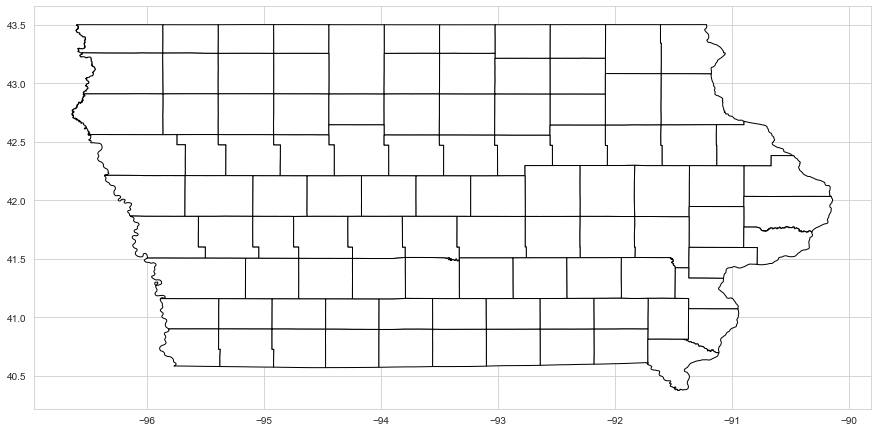

In [63]:
iowa.set_geometry('Geometry').plot(figsize=(15, 15), color='white', edgecolor='black')

Next, we need to place each point on the map.

In [31]:
coord = df['store_location'].str.strip().str[7:-1]
x = coord.str.split(' ').str[0]
y = coord.str.split(' ').str[1]

In [48]:
x[:5]

0    -91.29083400000002
1            -92.648062
2            -91.697941
3            -93.739105
4            -90.611972
Name: store_location, dtype: object

In [49]:
y[:5]

0    42.108203
1    41.292614
2     41.97447
3    41.629364
4    41.538207
Name: store_location, dtype: object

In [34]:
crs = {'init':'epsg:4326'}

In [35]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=gpd.points_from_xy(x, y))

<Figure size 1080x576 with 0 Axes>

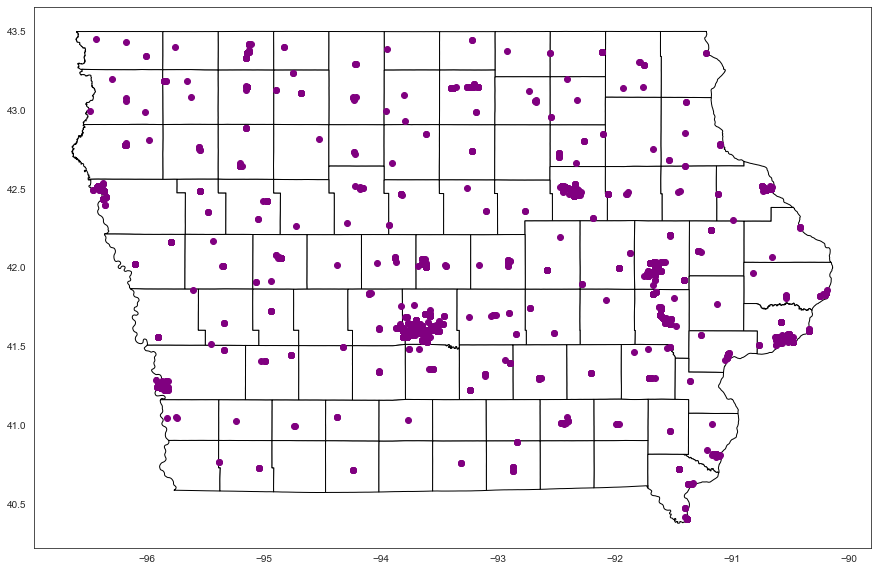

In [36]:
plt.figure(figsize=(15, 8))
ax = iowa.set_geometry('Geometry').plot(figsize=(15, 15), color='white', edgecolor='black')
geo_df.plot(ax=ax, color='purple')
plt.show()

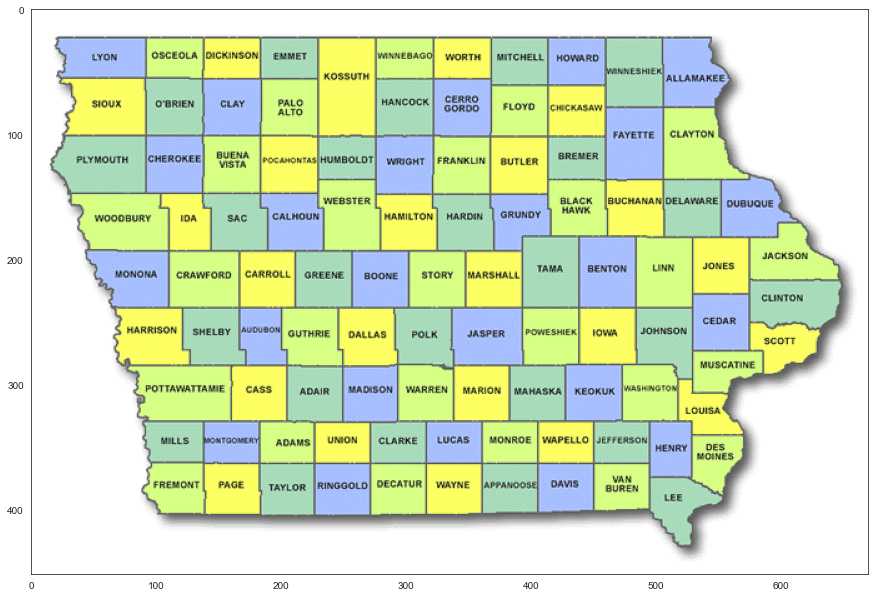

In [37]:
import matplotlib.image as mpimg

plt.figure(figsize=(15, 15))
plt.imshow(mpimg.imread('iowa_county_map.gif'))

Store locations are mostly in Polk.

In [53]:
# df.drop('store_location', axis=1, inplace=True)

In [38]:
sns.set_style('whitegrid')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   store_name           2083 non-null   object  
 1   city                 2083 non-null   object  
 2   zip_code             2083 non-null   object  
 3   store_location       2083 non-null   object  
 4   county               2083 non-null   object  
 5   category_name        2083 non-null   object  
 6   vendor_name          2083 non-null   object  
 7   item_description     2083 non-null   object  
 8   pack                 2083 non-null   int64   
 9   bottle_volume_ml     2083 non-null   int64   
 10  state_bottle_cost    2083 non-null   float64 
 11  state_bottle_retail  2083 non-null   float64 
 12  bottles_sold         2083 non-null   int64   
 13  sale_dollars         2083 non-null   float64 
 14  volume_sold_liters   2083 non-null   float64 
 15  volume_sold_gallons  

**sale_dollars vs object attributes**

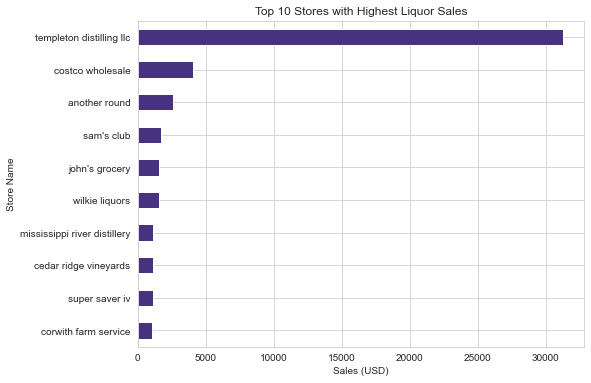

In [76]:
by_storename = df.groupby('store_name').mean()

plt.figure(figsize=(8, 6))
by_storename.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Stores with Highest Liquor Sales')
plt.ylabel('Store Name')
plt.xlabel('Sales (USD)')
plt.show();

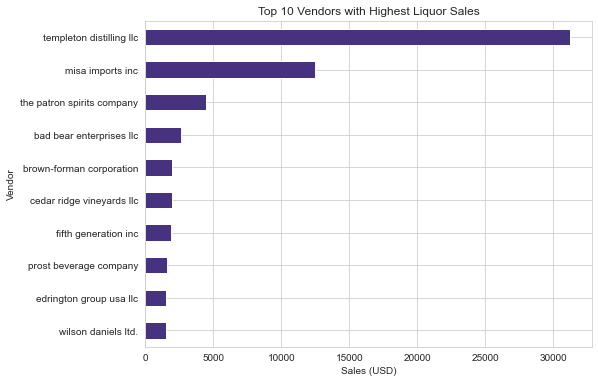

In [77]:
by_vendor = df.groupby('vendor_name').mean()

plt.figure(figsize=(8, 6))
by_vendor.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Vendors with Highest Liquor Sales')
plt.ylabel('Vendor')
plt.xlabel('Sales (USD)')
plt.show();

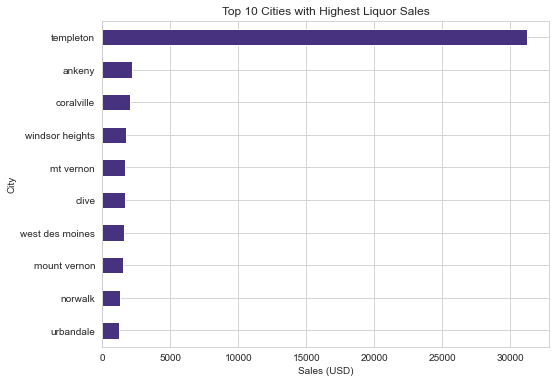

In [74]:
by_city = df.groupby('city').mean()

plt.figure(figsize=(8, 6))
by_city.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Cities with Highest Liquor Sales')
plt.ylabel('City')
plt.xlabel('Sales (USD)')
plt.show();

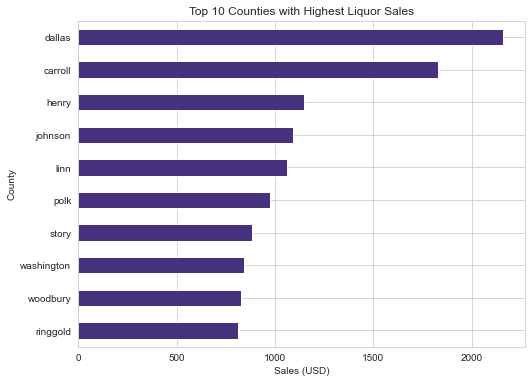

In [80]:
by_county = df.groupby('county').mean()

plt.figure(figsize=(8, 6))
by_county.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Counties with Highest Liquor Sales')
plt.ylabel('County')
plt.xlabel('Sales (USD)')
plt.show();

Highest store and vendor are in Templeton, which is located in Carroll county. But the highest sale based on county is Dallas when Carroll is second. Maybe because the price for 1 bottle is higher than other cities.

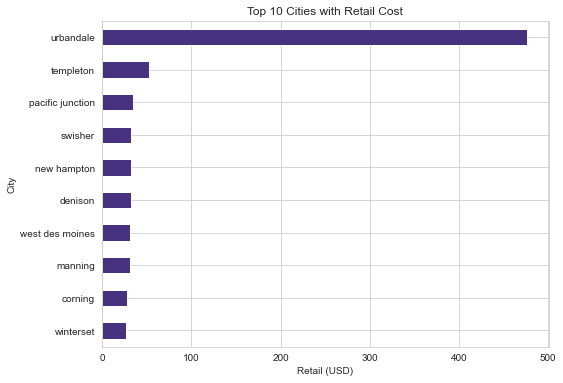

In [82]:
by_city = df.groupby('city').mean()

plt.figure(figsize=(8, 6))
by_city.sort_values('state_bottle_retail', ascending=True)['state_bottle_retail'].tail(10).plot(kind='barh')
plt.title('Top 10 Cities with Retail Cost')
plt.ylabel('City')
plt.xlabel('Retail (USD)')
plt.show();

Turns out Templeton's liquors are relatively not expensive.

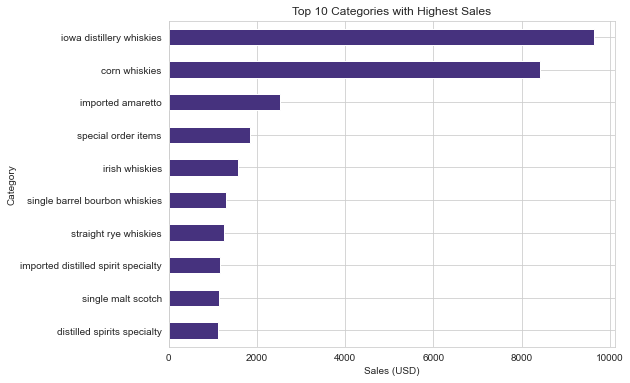

In [87]:
by_category = df.groupby('category_name').mean()

plt.figure(figsize=(8, 6))
by_category.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Categories with Highest Sales')
plt.ylabel('Category')
plt.xlabel('Sales (USD)')
plt.show();

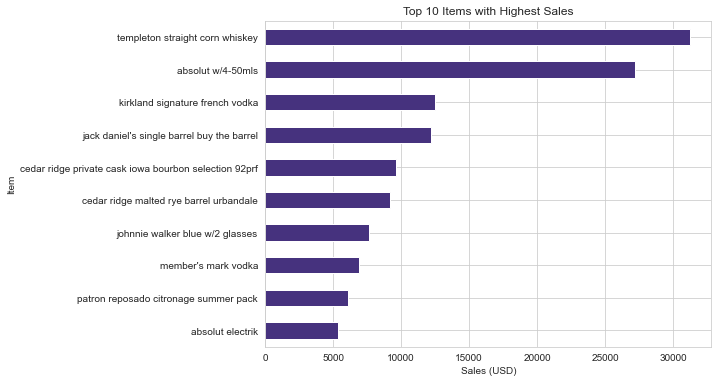

In [85]:
by_itemdesc = df.groupby('item_description').mean()

plt.figure(figsize=(8, 6))
by_itemdesc.sort_values('sale_dollars', ascending=True)['sale_dollars'].tail(10).plot(kind='barh')
plt.title('Top 10 Items with Highest Sales')
plt.ylabel('Item')
plt.xlabel('Sales (USD)')
plt.show();

In [47]:
by_itemdesc.sort_values('sale_dollars', ascending=False).head(10)

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
item_description,,,,,,,,,,,,
templeton straight corn whiskey,6.0,750.0,34.73,52.10,600.0,31260.00,450.00,118.870,2020.0,8.0,13.0,3.0
absolut w/4-50mls,1.0,750.0,137.13,206.07,132.0,27201.24,99.00,26.150,2013.0,10.0,9.0,2.0
kirkland signature french vodka,6.0,1750.0,14.47,21.71,576.0,12504.96,1008.00,266.280,2020.0,11.0,3.0,1.0
jack daniel's single barrel buy the barrel,6.0,750.0,27.09,40.64,300.0,12192.00,225.00,59.440,2017.0,9.0,27.0,2.0
cedar ridge private cask iowa bourbon selection 92prf,6.0,750.0,21.00,31.50,306.0,9639.00,229.50,60.620,2019.0,11.0,20.0,2.0
cedar ridge malted rye barrel urbandale,1.0,180000.0,6100.00,9150.00,1.0,9150.00,180.00,47.550,2015.0,12.0,3.0,3.0
johnnie walker blue w/2 glasses,3.0,750.0,130.00,195.00,39.0,7605.00,29.25,7.730,2014.0,10.0,20.0,0.0
member's mark vodka,6.0,1750.0,8.51,12.77,540.0,6895.80,945.00,249.645,2017.5,7.0,13.0,4.0
patron reposado citronage summer pack,6.0,750.0,27.00,40.50,150.0,6075.00,112.50,29.720,2012.5,4.5,12.5,1.5


These are the top 10 most popular liquors in Iowa.

In [88]:
df.head().T

,0,1,2,3,4
store_name,"giggle juice liquor station, llc",fareway stores,hy-vee,hy-vee,hy-vee
city,anamosa,oskaloosa,cedar rapids,urbandale,davenport
zip_code,52205,52577,52405,50322,52804
county,jones,mahaska,linn,polk,scott
category_name,cocktails / rtd,distilled spirits specialty,aged dark rum,corn whiskies,straight rye whiskies
vendor_name,mango bottling,gunsandmore,phillips beverage company,cedar ridge vineyards llc,mississippi river distilling co
item_description,tooters ala bama slama,sipp'n sweet corn,cross keys rum,cedar ridge malted rye barrel urbandale,cody road rye
pack,12,12,12,1,6
bottle_volume_ml,375,375,750,180000,750
state_bottle_cost,5.75,10.5,10.07,6100.0,19.33


<h1><center>##############################</center></h1>

<h1><center>CHECKPOINT</center></h1>

<h1><center>##############################</center></h1>

# Build a Regression Model

From the cleaned data that we have, we will try to build a simple regression model based on the `state_bottle_retail`.

In [89]:
import pandas as pd

df = pd.read_csv('data-cleaned.csv')
df.head()

,store_name,city,zip_code,store_location,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month,day,day_of_week
0,"giggle juice liquor station, llc",anamosa,52205,POINT (-91.29083400000002 42.108203),jones,cocktails / rtd,mango bottling,tooters ala bama slama,12,375,5.75,8.63,1,8.63,0.37,0.09,2016,8,29,0
1,fareway stores,oskaloosa,52577,POINT (-92.648062 41.292614),mahaska,distilled spirits specialty,gunsandmore,sipp'n sweet corn,12,375,10.50,15.75,60,945.00,22.50,5.94,2012,9,5,2
2,hy-vee,cedar rapids,52405,POINT (-91.697941 41.97447),linn,aged dark rum,phillips beverage company,cross keys rum,12,750,10.07,15.11,36,543.96,27.00,7.13,2019,11,4,0
3,hy-vee,urbandale,50322,POINT (-93.739105 41.629364),polk,corn whiskies,cedar ridge vineyards llc,cedar ridge malted rye barrel urbandale,1,180000,6100.00,9150.00,1,9150.00,180.00,47.55,2015,12,3,3
4,hy-vee,davenport,52804,POINT (-90.611972 41.538207),scott,straight rye whiskies,mississippi river distilling co,cody road rye,6,750,19.33,29.00,18,522.00,13.50,3.57,2012,11,29,3


The attributes for the training are `store_name`, `city`, `county`, `category_name`, `vendor_name`, `item_description`, `pack`, `bottle_volume_ml`, `state_bottle_cost`, `month`, `day`, `day_of_week`.

In [117]:
data = df[['store_name', 'city', 'county', 'category_name', 'vendor_name', 'item_description', 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'month', 'day', 'day_of_week', 'state_bottle_retail']]
data.head()

,store_name,city,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,month,day,day_of_week,state_bottle_retail
0,"giggle juice liquor station, llc",anamosa,jones,cocktails / rtd,mango bottling,tooters ala bama slama,12,375,5.75,8,29,0,8.63
1,fareway stores,oskaloosa,mahaska,distilled spirits specialty,gunsandmore,sipp'n sweet corn,12,375,10.50,9,5,2,15.75
2,hy-vee,cedar rapids,linn,aged dark rum,phillips beverage company,cross keys rum,12,750,10.07,11,4,0,15.11
3,hy-vee,urbandale,polk,corn whiskies,cedar ridge vineyards llc,cedar ridge malted rye barrel urbandale,1,180000,6100.00,12,3,3,9150.00
4,hy-vee,davenport,scott,straight rye whiskies,mississippi river distilling co,cody road rye,6,750,19.33,11,29,3,29.00


**Check missing values**

In [100]:
df.isna().sum()

store_name             0
city                   0
zip_code               0
store_location         0
county                 0
category_name          0
vendor_name            0
item_description       0
pack                   0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
volume_sold_liters     0
volume_sold_gallons    0
year                   0
month                  0
day                    0
day_of_week            0
dtype: int64

**Categorical variables**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2083 non-null   object 
 1   city                 2083 non-null   object 
 2   county               2083 non-null   object 
 3   category_name        2083 non-null   object 
 4   vendor_name          2083 non-null   object 
 5   item_description     2083 non-null   object 
 6   pack                 2083 non-null   int64  
 7   bottle_volume_ml     2083 non-null   int64  
 8   state_bottle_cost    2083 non-null   float64
 9   month                2083 non-null   int64  
 10  day                  2083 non-null   int64  
 11  day_of_week          2083 non-null   int64  
 12  state_bottle_retail  2083 non-null   float64
dtypes: float64(2), int64(5), object(6)
memory usage: 211.7+ KB


There is still a problem. To feed the data into a regression model, it needs to be in numerical. So to solve this problem, we need to convert the object attributes into categorical.

In [97]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

store_name
city
county
category_name
vendor_name
item_description


In [118]:
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype('category').cat.as_ordered()

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   store_name           2083 non-null   category
 1   city                 2083 non-null   category
 2   county               2083 non-null   category
 3   category_name        2083 non-null   category
 4   vendor_name          2083 non-null   category
 5   item_description     2083 non-null   category
 6   pack                 2083 non-null   int64   
 7   bottle_volume_ml     2083 non-null   int64   
 8   state_bottle_cost    2083 non-null   float64 
 9   month                2083 non-null   int64   
 10  day                  2083 non-null   int64   
 11  day_of_week          2083 non-null   int64   
 12  state_bottle_retail  2083 non-null   float64 
dtypes: category(6), float64(2), int64(5)
memory usage: 171.6 KB


In [119]:
for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        data[label] = pd.Categorical(content).codes

In [120]:
data.head()

,store_name,city,county,category_name,vendor_name,item_description,pack,bottle_volume_ml,state_bottle_cost,month,day,day_of_week,state_bottle_retail
0,97,6,49,15,34,375,12,375,5.75,8,29,0,8.63
1,87,140,57,20,25,317,12,375,10.50,9,5,2,15.75
2,114,28,53,1,44,89,12,750,10.07,11,4,0,15.11
3,114,191,72,17,9,74,1,180000,6100.00,12,3,3,9150.00
4,114,48,78,49,39,86,6,750,19.33,11,29,3,29.00


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083 entries, 0 to 2082
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   store_name           2083 non-null   int16  
 1   city                 2083 non-null   int16  
 2   county               2083 non-null   int8   
 3   category_name        2083 non-null   int8   
 4   vendor_name          2083 non-null   int8   
 5   item_description     2083 non-null   int16  
 6   pack                 2083 non-null   int64  
 7   bottle_volume_ml     2083 non-null   int64  
 8   state_bottle_cost    2083 non-null   float64
 9   month                2083 non-null   int64  
 10  day                  2083 non-null   int64  
 11  day_of_week          2083 non-null   int64  
 12  state_bottle_retail  2083 non-null   float64
dtypes: float64(2), int16(3), int64(5), int8(3)
memory usage: 132.3 KB


**Split into train and test sets**

In [192]:
X = data.drop('state_bottle_retail', axis=1)
y = data['state_bottle_retail']

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
len(X_train), len(X_test)

(1458, 625)

**Train the model**

We will compare 2 regression models: linear regression and random forest regression.
* Linear regression

In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
lr = LinearRegression(n_jobs=1)

In [197]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [198]:
lr_preds = lr.predict(X_test)

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, lr_preds):.5f}')
print(f'MSE: {mean_squared_error(y_test, lr_preds):.5f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, lr_preds)):.5f}')

MAE: 0.01484
MSE: 0.00410
RMSE: 0.06403


In [200]:
lr_preds = pd.Series(lr_preds)
y_test = y_test.reset_index(drop=True)

pd.DataFrame({'true_label':y_test, 'predicted_label':lr_preds})

,true_label,predicted_label
0,5.31,5.323293
1,17.82,17.838082
2,21.00,21.017066
3,3.50,3.479906
4,22.50,22.509415
...,...,...
620,20.10,19.733035
621,23.24,23.245362
622,6.26,6.263119
623,27.13,27.138310


* Random forest regression

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
rf = RandomForestRegressor()

In [203]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [204]:
rf_preds = rf.predict(X_test)

In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'MAE: {mean_absolute_error(y_test, rf_preds):.5f}')
print(f'MSE: {mean_squared_error(y_test, rf_preds):.5f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds)):.5f}')

MAE: 0.06487
MSE: 0.58664
RMSE: 0.76592


In [206]:
rf_preds = pd.Series(rf_preds)
y_test = y_test.reset_index(drop=True)

pd.DataFrame({'true_label':y_test, 'predicted_label':rf_preds})

,true_label,predicted_label
0,5.31,5.3225
1,17.82,17.9259
2,21.00,20.9969
3,3.50,3.5000
4,22.50,22.4999
...,...,...
620,20.10,20.0591
621,23.24,23.3990
622,6.26,6.2476
623,27.13,27.1300


In [211]:
print(pd.DataFrame({'true_label':y_test,
                    'predicted_label_lr':lr_preds,
                    'predicted_label_rf':rf_preds}).head(10))

print(f'RMSE_lr: {np.sqrt(mean_squared_error(y_test, lr_preds)):.5f}')
print(f'RMSE_rf: {np.sqrt(mean_squared_error(y_test, rf_preds)):.5f}')

   true_label  predicted_label_lr  predicted_label_rf
0        5.31            5.323293              5.3225
1       17.82           17.838082             17.9259
2       21.00           21.017066             20.9969
3        3.50            3.479906              3.5000
4       22.50           22.509415             22.4999
5       18.75           18.755493             18.7385
6        3.19            3.200913              3.1923
7       41.24           41.242428             43.3359
8        5.62            5.621888              5.6197
9        7.76            7.758848              7.7597
RMSE_lr: 0.06403
RMSE_rf: 0.76592


Looks like out of the two models with no hyperparameter tuning, our linear regression model performs better. Let's save this model.

In [212]:
import joblib

joblib.dump(lr, 'lr_model.joblib')

['lr_model.joblib']